In [606]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('titanic.csv')
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace=True)
df.Age.interpolate('linear', inplace=True)
max_Fare = df.Fare.mean() + 3*df.Fare.std()
df = df[df.Fare < max_Fare]
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,22.5,23.4500
889,1,1,male,26.0,30.0000


In [607]:
df.describe()

,Survived,Pclass,Age,Fare
count,871.000000,871.000000,871.000000,871.000000
mean,0.376579,2.338691,29.663513,26.530170
std,0.484806,0.821469,13.926155,29.351184
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,21.000000,7.895800
50%,0.000000,3.000000,28.500000,13.862500
75%,1.000000,3.000000,38.000000,30.000000
max,1.000000,3.000000,80.000000,164.866700


array([<Axes: title={'center': 'Age'}, xlabel='Sex'>,
       <Axes: title={'center': 'Fare'}, xlabel='Sex'>], dtype=object)

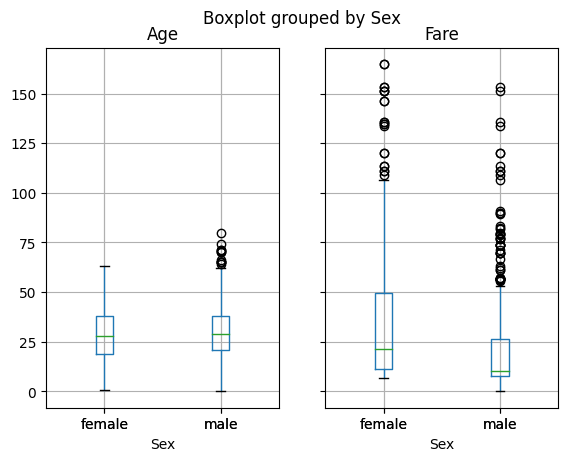

In [608]:
df.boxplot(column = ['Age', 'Fare'], by = 'Sex')

In [609]:
dummies = pd.get_dummies(df.Sex, dtype = int)

In [610]:
merged = pd.concat([df, dummies], axis = 'columns')
merged.drop(['Sex'], axis ='columns', inplace = True)

<Axes: >

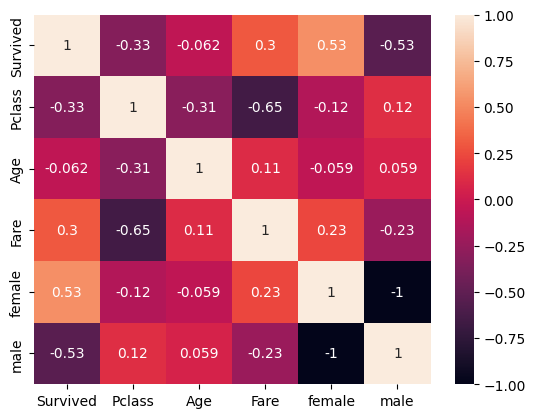

In [611]:
corr = merged.corr()
sns.heatmap(corr, annot=True)

In [612]:
#genero los dummies
X = df.drop(['Survived'], axis = 'columns')
y = df.Survived

le = LabelEncoder()
dfle = X
dfle.Sex = le.fit_transform(dfle.Sex)
dfle

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,22.5,23.4500
889,1,1,26.0,30.0000


In [613]:
ct = ColumnTransformer([('Sex', OneHotEncoder(), [1])], remainder='passthrough')

X = ct.fit_transform(dfle)
X = pd.DataFrame(X, columns =['Female', 'Male', 'Class', 'Age', 'Fare'])
X.drop(['Female'], axis = 'columns', inplace = True)

In [614]:
#divido la data en train y test

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [615]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [616]:
model.score(X_test, y_test)

0.7431192660550459

In [617]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(158.22222222222223, 0.5, 'Truth')

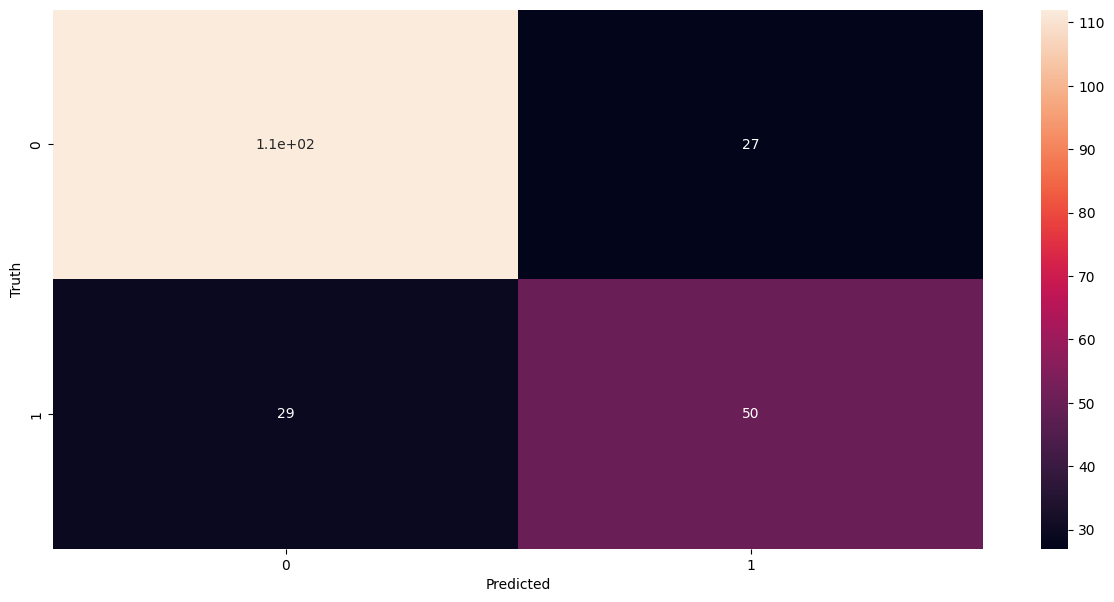

In [618]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')